In [1]:
import os

import pandas as pd
import numpy as np
import multimatch_gaze as mmg
from mlxtend.evaluate import permutation_test

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use('seaborn-whitegrid')

**Housekeeping happens here.**

In [2]:
sub_test_list = ['%.2d' % i for i in range(1, 20)]
sub_train_list= ['%.2d' % i for i in range(21, 37)]
run_list = ['%.1d' % j for j in range(1, 9)]
run_list = ['1']

In [3]:
print('fMRI-Subjects:', sub_test_list)
print('in lab-Subjects:', sub_train_list)
print('runs:', run_list)

fMRI-Subjects: ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
in lab-Subjects: ['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
runs: ['1']


In [4]:
screen_size = [1280, 720]

In [5]:
# delete missing subjects from combi dataset
sub_test_list.remove('07')
sub_test_list.remove('08')
sub_test_list.remove('11')
sub_test_list.remove('12')
sub_test_list.remove('13')

# delete missing subjects from in-lab dataset
sub_train_list.remove('21')

data_dir = os.path.expanduser('~') + '/Desktop/studyforrest-data-eyemovementlabels'
out_dir = data_dir + '/code/output'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

chunk_dir = out_dir + '/chunks'

if not os.path.exists(chunk_dir):
    os.makedirs(chunk_dir)
    
scene_trans_dir = out_dir + '/scene_trans'

if not os.path.exists(scene_trans_dir):
    os.makedirs(scene_trans_dir)
    
scene_rnd_dir = out_dir + '/scene_rnd'

if not os.path.exists(scene_rnd_dir):
    os.makedirs(scene_rnd_dir)

simi_matrices_dir = out_dir + '/simi_matrices'

if not os.path.exists(simi_matrices_dir):
    os.makedirs(simi_matrices_dir)
    
simi_matrices_train_dir = out_dir + '/simi_matrices_train'

if not os.path.exists(simi_matrices_train_dir):
    os.makedirs(simi_matrices_train_dir)

In [6]:
def load_eye_data(data_dir, sub, run):
    '''
    Load individual eye-gaze paths for each subject. Add one column to indicate subject-id
    and one to indicate to current run.
    '''
    sub_data = data_dir + f'/sub-{sub}/sub-{sub}_task-movie_run-{run}_events.tsv' 
    eye_data = pd.read_csv(sub_data, sep='\t')
    eye_data.insert(loc=0, column='subject', value=int(sub))
    eye_data.insert(loc=1, column='run', value=int(run))
    
    return eye_data

In [7]:
def split_data(in_data, start_onset, stop_onset, time_step):
    '''
    Take input data, divide data into equally long chunks based on start and stop onsets, 
    return array of chunks.
    '''
    chunk_list = []
    for chunk in range(1, len(in_data['onset'])):
        
        if not in_data[(in_data['onset'] < stop_onset) & (in_data['onset'] > start_onset)].empty:
            
            chunk_tmp = in_data[(in_data['onset'] < stop_onset) & (in_data['onset'] > start_onset)]
            chunk_tmp.insert(loc=2, column='chunk', value=int(chunk))
            chunk_list.append(chunk_tmp)
            start_onset += time_step
            stop_onset += time_step
            
            print(f'Working on chunk-{chunk}:', start_onset, stop_onset)
        else:
            break
            
    return chunk_list

In [8]:
start_onset = 0
stop_onset = 2
time_step = 2

labeled_train_data_out = []

In [9]:
for sub in sub_train_list:
    for run in run_list: 
        '''
        Loop through all subjects and runs, combine the specified columns.
        '''
        tmp_data = load_eye_data(data_dir, sub, run)#[['subject', 'run',  'onset', 'duration', 
                                                     # 'label', 'start_x', 'start_y', 'end_x', 'end_y']]
        labeled_train_data_out.append(tmp_data)

# combine the data
labeled_train_data = pd.concat(labeled_train_data_out, ignore_index=True)

# chunk the data 
chunk_train_data = pd.concat(split_data(in_data=labeled_train_data, start_onset=start_onset, 
                                        stop_onset=stop_onset, time_step=time_step), ignore_index=True)

Working on chunk-1: 2 4
Working on chunk-2: 4 6
Working on chunk-3: 6 8
Working on chunk-4: 8 10
Working on chunk-5: 10 12
Working on chunk-6: 12 14
Working on chunk-7: 14 16
Working on chunk-8: 16 18
Working on chunk-9: 18 20
Working on chunk-10: 20 22
Working on chunk-11: 22 24
Working on chunk-12: 24 26
Working on chunk-13: 26 28
Working on chunk-14: 28 30
Working on chunk-15: 30 32
Working on chunk-16: 32 34
Working on chunk-17: 34 36
Working on chunk-18: 36 38
Working on chunk-19: 38 40
Working on chunk-20: 40 42
Working on chunk-21: 42 44
Working on chunk-22: 44 46
Working on chunk-23: 46 48
Working on chunk-24: 48 50
Working on chunk-25: 50 52
Working on chunk-26: 52 54
Working on chunk-27: 54 56
Working on chunk-28: 56 58
Working on chunk-29: 58 60
Working on chunk-30: 60 62
Working on chunk-31: 62 64
Working on chunk-32: 64 66
Working on chunk-33: 66 68
Working on chunk-34: 68 70
Working on chunk-35: 70 72
Working on chunk-36: 72 74
Working on chunk-37: 74 76
Working on chunk-

Working on chunk-290: 580 582
Working on chunk-291: 582 584
Working on chunk-292: 584 586
Working on chunk-293: 586 588
Working on chunk-294: 588 590
Working on chunk-295: 590 592
Working on chunk-296: 592 594
Working on chunk-297: 594 596
Working on chunk-298: 596 598
Working on chunk-299: 598 600
Working on chunk-300: 600 602
Working on chunk-301: 602 604
Working on chunk-302: 604 606
Working on chunk-303: 606 608
Working on chunk-304: 608 610
Working on chunk-305: 610 612
Working on chunk-306: 612 614
Working on chunk-307: 614 616
Working on chunk-308: 616 618
Working on chunk-309: 618 620
Working on chunk-310: 620 622
Working on chunk-311: 622 624
Working on chunk-312: 624 626
Working on chunk-313: 626 628
Working on chunk-314: 628 630
Working on chunk-315: 630 632
Working on chunk-316: 632 634
Working on chunk-317: 634 636
Working on chunk-318: 636 638
Working on chunk-319: 638 640
Working on chunk-320: 640 642
Working on chunk-321: 642 644
Working on chunk-322: 644 646
Working on

**Get some descriptives for communication:**
- Overview of one chunk
- List of unique eye movement labels
- Number of processable chunks per run

In [10]:
chunk_train_data[(chunk_train_data['subject'] == 1) & (chunk_train_data['chunk'] == 1)]

,subject,run,chunk,onset,duration,label,start_x,start_y,end_x,end_y,amp,peak_vel,med_vel,avg_vel


In [11]:
eyegaze_features = pd.unique(chunk_train_data['label']) # categorical data: get different labels types
eyegaze_features

array(['SACC', 'FIXA', 'PURS', 'LPSO', 'HPSO', 'ISAC', 'ILPS', 'IHPS'],
      dtype=object)

In [12]:
for run in run_list:
    print(f'Number of chunks in run-{run}: ', 
          np.max(chunk_train_data[(chunk_train_data['run'] == int(run))]['chunk']))

Number of chunks in run-1:  452


**Potential Problem:** 
- Recentering from one scene to another may introduce a similarity bias
- check if that's true

**Procedure:** 
- Compare all the similarity of all eye movements 3 seconds after scene change vs. eye movement at a 10 x random different location within the following scene of the same length
- Bootstrap the data and compare

In [13]:
annotation = pd.read_csv('~/Desktop/studyforrest-data-annotations/researchcut/locations.tsv',
                   sep='\t')
annotation

,onset,duration,major_location,setting,locale,int_or_ext,flow_of_time,time_of_day
0,0.00,17.00,Paramount,mountain logo,mountain logo,ext,0,day
1,17.00,151.08,Savannah,sky over Savannah,sky over Savannah,ext,++,day
2,168.08,104.12,Savannah,bench at bus stop,bench at bus stop,ext,0,day
3,272.20,14.12,Greenbow Alabama,doctor's office,doctor's office,int,-,day
4,286.32,14.24,Greenbow Alabama,doctor's office,doctor's office,int,0,day
...,...,...,...,...,...,...,...,...
864,7004.32,1.56,Gump property,access-road,at the mail boxes,ext,0,day
865,7005.88,2.12,Gump property,access-road,at the mail boxes,ext,0,day
866,7008.00,5.00,Gump property,access-road,at the mail boxes,ext,0,day
867,7013.00,9.00,Gump property,access-road,at the mail boxes,ext,0,day


**Multimatch gaze output order:** Array of 5 scanpath similarity measures. Vector (Shape), Direction (Angle), Length, Position, and Duration. 1 means absolute similarity, 0 means lowest similarity possible.

**Random scenes:** Pick a random timeslot within each scene to test if the scanpath is actually different from the transition

In [14]:
index = 0
sample_duration = 3#1.5

for start_scene in annotation['onset'][:10]:
    index += 1

    rnd_start = np.around(np.random.uniform(start_scene + sample_duration, annotation['onset'][index]), decimals=2)
    print('Trans: start', start_scene, '\t stop', start_scene + sample_duration)
    
    print('Rnd: start', rnd_start, '\t stop', rnd_start + sample_duration)
    
    for sub in sub_train_list:
        file_name_trans = scene_trans_dir + f'/scene-trans-{index}_sub-{sub}.tsv'
        scene_trans = chunk_train_data[(chunk_train_data['subject'] == int(sub)) &
                                       (chunk_train_data['onset'] > start_scene) & 
                                       (chunk_train_data['onset'] < start_scene + sample_duration)].drop(columns=['subject', 'run', 'chunk'])

        scene_trans.to_csv(file_name_trans, index=False, sep ='\t')
        scene_trans.insert(loc=3, column='scene_trans', value=index)
        
        file_name_rnd = scene_rnd_dir + f'/scene-rnd-{index}_sub-{sub}.tsv'
        scene_rnd = chunk_train_data[(chunk_train_data['subject'] == int(sub)) &
                                       (chunk_train_data['onset'] > rnd_start) & 
                                       (chunk_train_data['onset'] < rnd_start + sample_duration)].drop(columns=['subject', 'run', 'chunk'])

        scene_rnd.to_csv(file_name_rnd, index=False, sep ='\t')
        scene_rnd.insert(loc=3, column='scene_trans', value=index)

Trans: start 0.0 	 stop 3.0
Rnd: start 3.81 	 stop 6.8100000000000005
Trans: start 17.0 	 stop 20.0
Rnd: start 41.46 	 stop 44.46
Trans: start 168.08 	 stop 171.08
Rnd: start 254.03 	 stop 257.03
Trans: start 272.2 	 stop 275.2
Rnd: start 275.83 	 stop 278.83
Trans: start 286.32 	 stop 289.32
Rnd: start 291.95 	 stop 294.95
Trans: start 300.56 	 stop 303.56
Rnd: start 304.95 	 stop 307.95
Trans: start 311.96 	 stop 314.96
Rnd: start 316.97 	 stop 319.97
Trans: start 318.28 	 stop 321.28
Rnd: start 325.08 	 stop 328.08
Trans: start 343.04 	 stop 346.04
Rnd: start 349.24 	 stop 352.24
Trans: start 353.08 	 stop 356.08
Rnd: start 357.81 	 stop 360.81


In [15]:
scene_trans_sim = []
scene_index = 1

for sub in sub_train_list:
    a=mmg.remodnav_reader(scene_trans_dir + f'/scene-trans-{scene_index}_sub-01.tsv', screensize=screen_size)
    b=mmg.remodnav_reader(scene_trans_dir + f'/scene-trans-{scene_index}_sub-{sub}.tsv', screensize=screen_size)
    print(mmg.docomparison(a, b, screensize=screen_size))
    scene_trans_sim.append(mmg.docomparison(a, b, screensize=screen_size))    

[0.9293904293264905, 0.627547704155986, 0.9880728656991891, 0.8938123109925831, 0.45783132530120474]
[0.9134775094799018, 0.3666804805423718, 0.9585966863864666, 0.8501355514915249, 0.6039645466522937]
[0.9400258507559281, 0.7231700141533886, 0.9536166959939357, 0.9234007377759474, 0.19318355813532662]
[0.9143972310043764, 0.8507670093611042, 0.8743205264375437, 0.8981185659948021, 0.5797101449275361]
[0.9320328186026544, 0.37628339822073, 0.9002973037004917, 0.874396082475322, 0.5188172043010753]
[0.9430067869520031, 0.4967960442412175, 0.9078208702932098, 0.905421369485653, 0.5275755879059351]
[0.9447220395312221, 0.7780586768730269, 0.8994588715560259, 0.8748582600105, 0.31157909115745386]
[0.9563679635538266, 0.6875677447078327, 0.9523305687625644, 0.8902931365926657, 0.35537588129201503]
[0.9444528117805651, 0.7237724659343734, 0.9010496468982171, 0.919388443137979, 0.5857271996785858]
[nan nan nan nan nan]
[0.9320786027937066, 0.6152612453767923, 0.9159179618910722, 0.89562563143

In [16]:
scene_rnd_sim = []

for sub in sub_train_list:
    a=mmg.remodnav_reader(scene_rnd_dir + f'/scene-rnd-{scene_index}_sub-01.tsv', screensize=screen_size)
    b=mmg.remodnav_reader(scene_rnd_dir + f'/scene-rnd-{scene_index}_sub-{sub}.tsv', screensize=screen_size)
    scene_rnd_sim.append(mmg.docomparison(a, b, screensize=screen_size))

In [17]:
# create pandas df from lists, drop first row
pos_trans=[position[1] for position in scene_trans_sim]
pos_rnd=[position[1] for position in scene_rnd_sim]

pos_df = pd.DataFrame(list(zip(pos_trans, pos_rnd)), columns=['Transion', 'Random']).drop([0])
pos_df

,Transion,Random
1,0.366680,0.079492
2,0.723170,0.818276
3,0.850767,0.624112
4,0.376283,0.372708
5,0.496796,0.522243
6,0.778059,0.290465
7,0.687568,0.665249
8,0.723772,0.382196
9,NaN,0.504515
10,0.615261,0.410176


In [18]:
p_value = permutation_test(pos_df['Transion'], pos_df['Random'],
                           method='approximate',
                           num_rounds=10000,
                           seed=0)
print(p_value)

9.999000099990002e-05


Look @ at the first fixation.

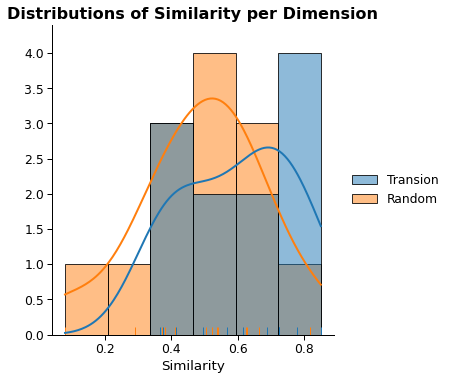

In [19]:
sns.set_context('paper', rc={"lines.linewidth": 2}, font_scale=1.4)
ax = sns.displot(pos_df, kde=True, rug=True)
ax.set(xlabel='Similarity', ylabel=' ')
#x.set(xlim=(0, 1.0))
plt.title('Distributions of Similarity per Dimension', weight='bold').set_fontsize('16')

**Start comparison of larger chunks**

In [20]:
# Save the chunked data as *.tsv files
for chunk in range(1, 452):
    for sub in sub_train_list:
        file_name = chunk_dir + f'/run-1_chunk-{chunk}_sub-{sub}.tsv'
        chunk_scene = chunk_train_data[(chunk_train_data['subject'] == int(sub)) & 
                         (chunk_train_data['chunk'] == chunk) &
                         (chunk_train_data['run'] == 1)].drop(columns=['subject', 'run', 'chunk'])
        
        chunk_scene.to_csv(file_name, index=False, sep ='\t')

In [21]:
chunk_train_sim = []
simi_dimensions = ['shape', 'direction', 'length', 'position', 'duration']

for dim in range(0, len(simi_dimensions)):
    for chunk in range(1, 452):
        for sub_a in sub_train_list:
            a=mmg.remodnav_reader(chunk_dir + f'/run-1_chunk-{chunk}_sub-{sub_a}.tsv', screensize=screen_size)

            for sub_b in sub_train_list:
                b=mmg.remodnav_reader(chunk_dir + f'/run-1_chunk-{chunk}_sub-{sub_b}.tsv', screensize=screen_size)
                chunk_train_sim.append(mmg.docomparison(a, b, screensize=screen_size)[dim])
        
        pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
        np.savetxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[dim]}_chunk-{chunk}.tsv', pos_sim, delimiter='\t')
        chunk_train_sim = []

<AxesSubplot:title={'center':'Lab-Group: Pairwise Similarity of Chunk-233 for Dimension: shape'}>

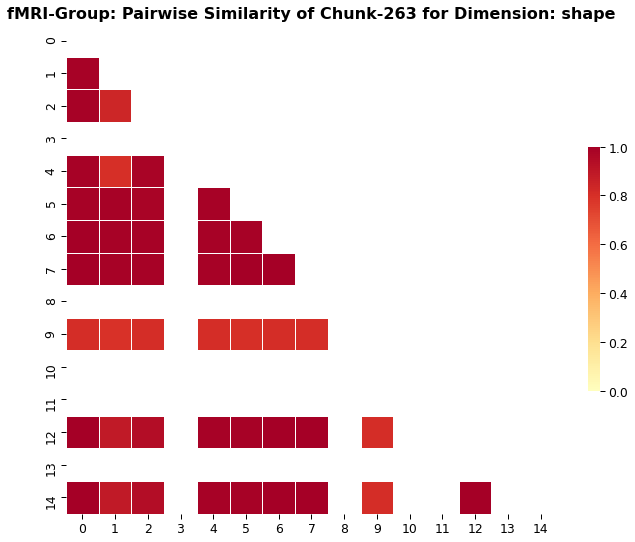

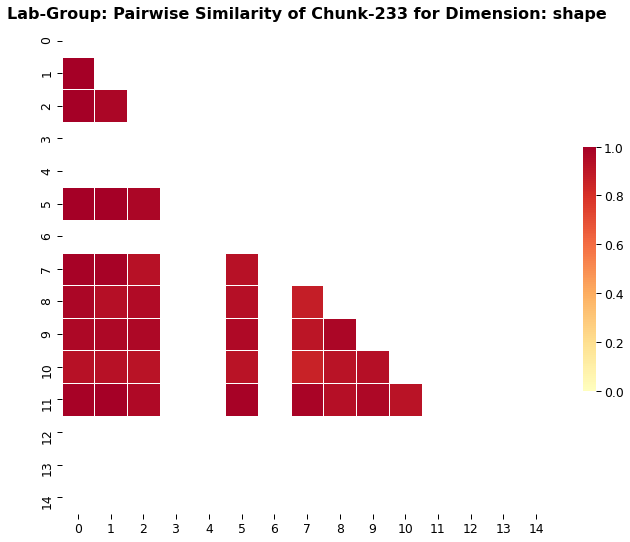

In [22]:
#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[0]}_chunk-{263}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_1 = plt.subplots(figsize=(11, 9))
plt.title(f'fMRI-Group: Pairwise Similarity of Chunk-{263} for Dimension: {simi_dimensions[0]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[0]}_chunk-{122}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_2 = plt.subplots(figsize=(11, 9))
plt.title(f'Lab-Group: Pairwise Similarity of Chunk-{233} for Dimension: {simi_dimensions[0]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:title={'center':'Lab-Group: Pairwise Similarity of Chunk-233 for Dimension: direction'}>

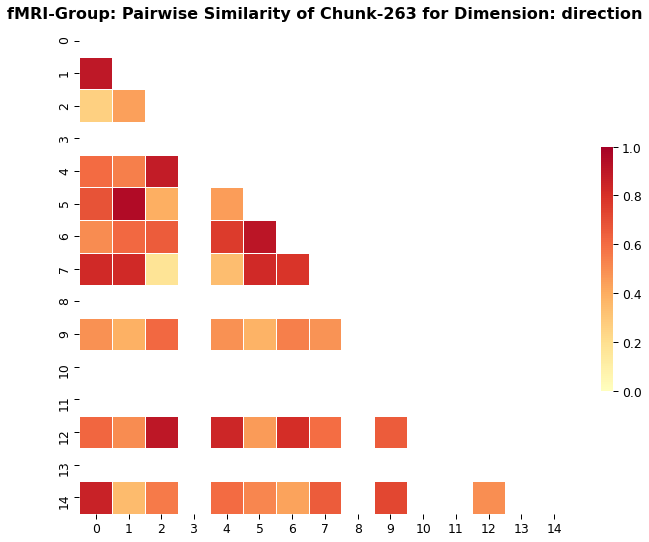

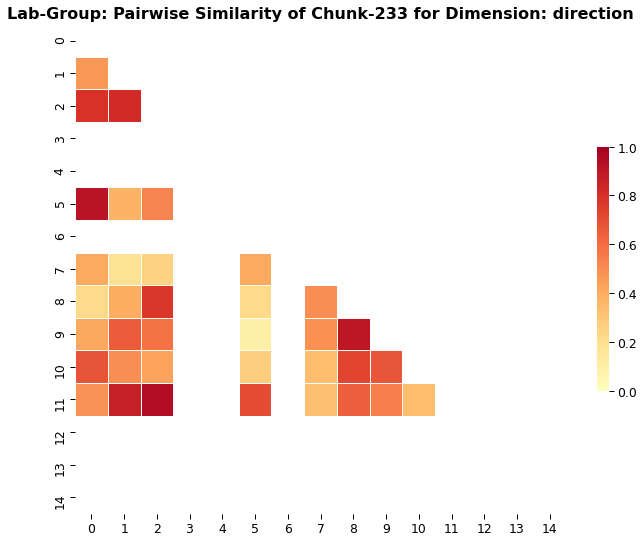

In [23]:
#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[1]}_chunk-{263}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_1 = plt.subplots(figsize=(11, 9))
plt.title(f'fMRI-Group: Pairwise Similarity of Chunk-{263} for Dimension: {simi_dimensions[1]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[1]}_chunk-{122}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_2 = plt.subplots(figsize=(11, 9))
plt.title(f'Lab-Group: Pairwise Similarity of Chunk-{233} for Dimension: {simi_dimensions[1]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:title={'center':'Lab-Group: Pairwise Similarity of Chunk-233 for Dimension: length'}>

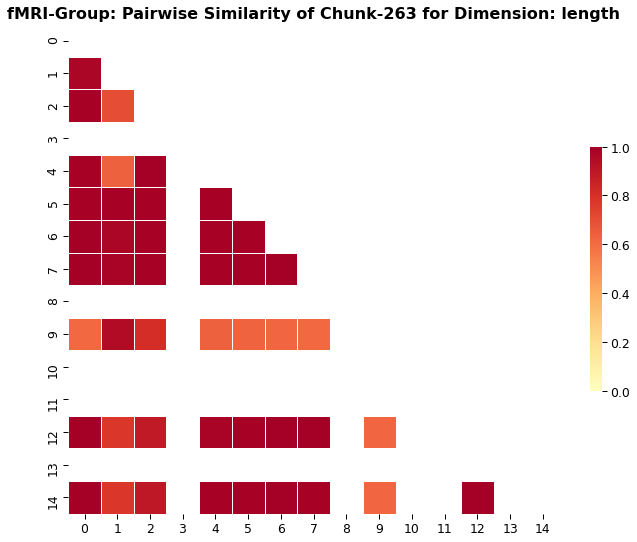

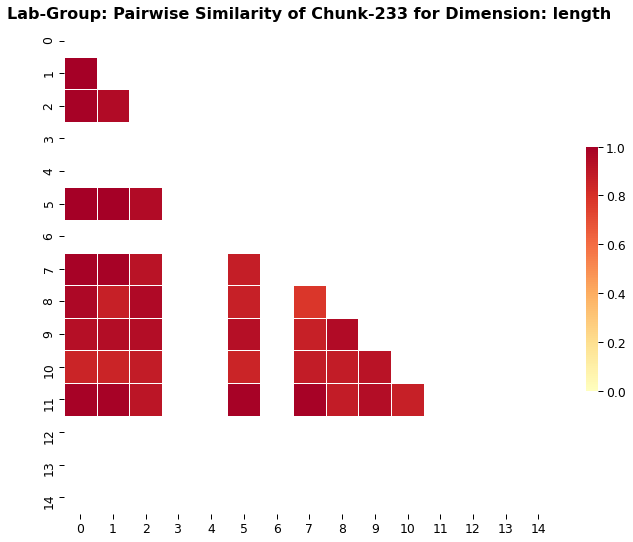

In [24]:
#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[2]}_chunk-{263}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_1 = plt.subplots(figsize=(11, 9))
plt.title(f'fMRI-Group: Pairwise Similarity of Chunk-{263} for Dimension: {simi_dimensions[2]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[2]}_chunk-{122}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_2 = plt.subplots(figsize=(11, 9))
plt.title(f'Lab-Group: Pairwise Similarity of Chunk-{233} for Dimension: {simi_dimensions[2]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_dir + f'/run-1_dim-{simi_dimensions[3]}_chunk-{263}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_1 = plt.subplots(figsize=(11, 9))
plt.title(f'fMRI-Group: Pairwise Similarity of Chunk-{263} for Dimension: {simi_dimensions[3]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[3]}_chunk-{122}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_2 = plt.subplots(figsize=(11, 9))
plt.title(f'Lab-Group: Pairwise Similarity of Chunk-{233} for Dimension: {simi_dimensions[3]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

OSError: /home/nima/Desktop/studyforrest-data-eyemovementlabels/code/output/simi_matrices/run-1_dim-position_chunk-263.tsv not found.

In [ ]:
#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_dir + f'/run-1_dim-{simi_dimensions[4]}_chunk-{263}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_1 = plt.subplots(figsize=(11, 9))
plt.title(f'fMRI-Group: Pairwise Similarity of Chunk-{263} for Dimension: {simi_dimensions[4]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})

#pos_sim = np.reshape(chunk_train_sim, (len(sub_train_list), len(sub_train_list)))
pos_sim = np.loadtxt(simi_matrices_train_dir + f'/run-1_dim-{simi_dimensions[4]}_chunk-{122}.tsv')
mask = np.triu(np.ones_like(pos_sim, dtype=bool))
f, ax_2 = plt.subplots(figsize=(11, 9))
plt.title(f'Lab-Group: Pairwise Similarity of Chunk-{233} for Dimension: {simi_dimensions[4]}', weight='bold').set_fontsize('16')
sns.heatmap(pos_sim, mask=mask, center=0, cmap=plt.cm.get_cmap('RdYlBu_r'), vmin=0, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .5})